In [28]:
import pandas as pd
import seaborn as sns
from sklearn import svm
from numpy import mean
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
import pickle

In [29]:
train = pd.read_csv('../../SIFTextraction/fracatlas/train.csv')
test = pd.read_csv('../../SIFTextraction/fracatlas/test.csv')
train = train[(train["leg"] == 1) & (train["mixed"] == 0)]
test = test[(test["leg"] == 1) & (test["mixed"] == 0)]
train

,image_id,hand,leg,hip,shoulder,mixed,label,0,1,2,...,190,191,192,193,194,195,196,197,198,199
0,IMG0000375.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.045642,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
2,IMG0002796.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,0.180938,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,0.017050
4,IMG0003388.jpg,0,1,0,0,0,0,-0.242657,-0.211284,0.003784,...,-0.094276,-0.033561,-0.252104,-0.209752,0.043732,-0.301074,-0.22646,-0.213012,-0.090127,-0.246858
5,IMG0001579.jpg,0,1,0,0,0,0,-0.105851,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
6,IMG0003618.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.161014,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.090127,-0.246858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,IMG0002995.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
3261,IMG0001188.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.213012,-0.251152,-0.246858
3262,IMG0001452.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.161014,...,-0.206691,-0.248059,-0.252104,-0.209752,0.043732,-0.301074,-0.22646,-0.213012,-0.251152,0.017050
3263,IMG0001181.jpg,0,1,0,0,0,0,-0.242657,-0.211284,-0.325812,...,-0.206691,-0.248059,-0.252104,-0.209752,-0.266092,-0.301074,-0.22646,-0.036574,-0.251152,-0.246858


In [30]:

X_train = train.drop(columns=['image_id', 'label'])
y_train = train['label']

X_test = test.drop(columns=['image_id', 'label'])
y_test = test['label']


model = svm.SVC(gamma='scale')

param_grid = {
    'class_weight': ({0:1, 1:4}, {0:1,1:5}, {0:1,1:7}),
    'kernel': ('rbf', 'sigmoid'),
    'C': (2, 3),
    'degree': (2, 3)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

grid_result = grid.fit(X_train, y_train)

# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.430106 using {'C': 3, 'class_weight': {0: 1, 1: 5}, 'degree': 2, 'kernel': 'rbf'}
0.380469 (0.138512) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 2, 'kernel': 'rbf'}
0.284945 (0.091389) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 2, 'kernel': 'sigmoid'}
0.380469 (0.138512) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 3, 'kernel': 'rbf'}
0.284945 (0.091389) with: {'C': 2, 'class_weight': {0: 1, 1: 4}, 'degree': 3, 'kernel': 'sigmoid'}
0.422391 (0.139410) with: {'C': 2, 'class_weight': {0: 1, 1: 5}, 'degree': 2, 'kernel': 'rbf'}
0.262623 (0.081245) with: {'C': 2, 'class_weight': {0: 1, 1: 5}, 'degree': 2, 'kernel': 'sigmoid'}
0.422391 (0.139410) with: {'C': 2, 'class_weight': {0: 1, 1: 5}, 'degree': 3, 'kernel': 'rbf'}
0.262623 (0.081245) with: {'C': 2, 'class_weight': {0: 1, 1: 5}, 'degree': 3, 'kernel': 'sigmoid'}
0.415644 (0.124793) with: {'C': 2, 'class_weight': {0: 1, 1: 7}, 'degree': 2, 'kernel': 'rbf'}
0.251155 (0.063772) with: {'C': 2, 'cla

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       369
           1       0.82      0.35      0.49        52

    accuracy                           0.91       421
   macro avg       0.87      0.67      0.72       421
weighted avg       0.90      0.91      0.89       421

Confusion Matrix:


<Axes: >

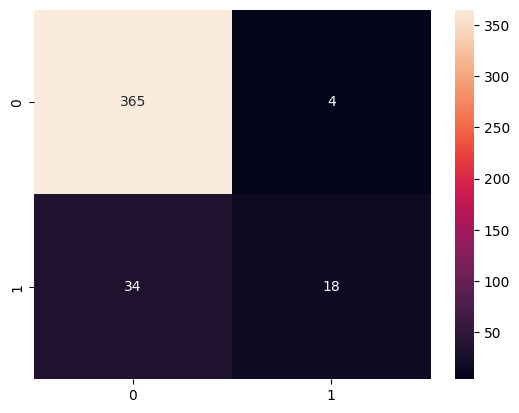

In [31]:
weigths = grid_result.best_params_['class_weight']
model = svm.SVC(gamma='scale', class_weight=weigths, kernel=grid_result.best_params_['kernel'], C=grid_result.best_params_['C'], degree=grid_result.best_params_['degree'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

In [32]:
pickle.dump(model, open('./models/svc_leg.pkl', 'wb'))

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import classification_report

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'Precision', 'Recall'])
callback = EarlyStopping(monitor='AUC', patience=3)
# Fit the model to the training data
model.fit(np.asarray(X_train).astype('float32'), np.asarray(y_train).astype('float32'), epochs=50, batch_size=64, class_weight={0: 1, 1: 6}, callbacks=[callback])

Epoch 1/50
27/27 [==============================] - 1s 6ms/step - loss: 0.9647 - accuracy: 0.8285 - auc: 0.6118 - precision: 0.1667 - recall: 0.2062
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 0.8587 - accuracy: 0.9090 - auc: 0.7318 - precision: 0.5229 - recall: 0.3562
Epoch 3/50
27/27 [==============================] - 0s 6ms/step - loss: 0.8113 - accuracy: 0.8732 - auc: 0.7419 - precision: 0.3511 - recall: 0.4125
Epoch 4/50
27/27 [==============================] - 0s 6ms/step - loss: 0.7536 - accuracy: 0.8867 - auc: 0.7797 - precision: 0.4154 - recall: 0.5063
Epoch 5/50
27/27 [==============================] - 0s 7ms/step - loss: 0.7201 - accuracy: 0.8784 - auc: 0.8015 - precision: 0.3917 - recall: 0.5312
Epoch 6/50
27/27 [==============================] - 0s 7ms/step - loss: 0.7123 - accuracy: 0.8837 - auc: 0.8051 - precision: 0.4059 - recall: 0.5125
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 0.6905 - accuracy: 0.8796 - auc: 0

In [34]:
# Predict on the test data
y_pred = model.predict(np.asarray(X_test).astype('float32'))

# Convert predictions to binary labels
y_pred_binary = np.round(y_pred)

# Generate classification report
report = classification_report(np.asarray(y_test).astype('float32'), y_pred_binary)
print("Classification Report:")
print(report)

14/14 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       369
         1.0       0.55      0.42      0.48        52

    accuracy                           0.89       421
   macro avg       0.74      0.69      0.71       421
weighted avg       0.88      0.89      0.88       421



<Axes: >

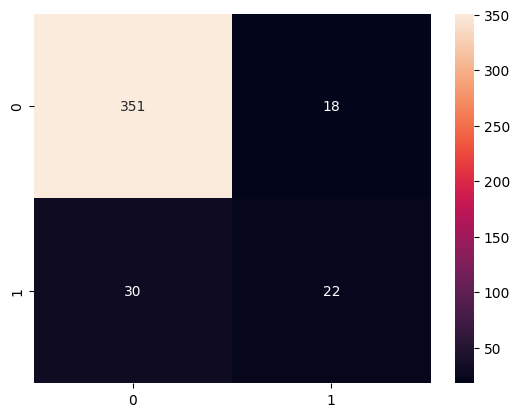

In [35]:
sns.heatmap(confusion_matrix(y_test,y_pred_binary),annot = True,fmt='d')

In [36]:
model.save('./models/nn_leg.h5')

In [37]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ('gini', 'entropy'),
    'splitter': ('best', 'random'),
    'max_depth': (None, 10, 20, 30)
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = DecisionTreeClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')

grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_ , grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.325110 using {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.305103 (0.098773) with: {'criterion': 'gini', 'max_depth': None, 'splitter': 'best'}
0.306431 (0.082691) with: {'criterion': 'gini', 'max_depth': None, 'splitter': 'random'}
0.298965 (0.110073) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
0.323774 (0.122920) with: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
0.300598 (0.103479) with: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
0.325110 (0.120594) with: {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.305297 (0.086164) with: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'best'}
0.288994 (0.107979) with: {'criterion': 'gini', 'max_depth': 30, 'splitter': 'random'}
0.283824 (0.090028) with: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
0.283071 (0.112218) with: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'random'}
0.300697 (0.113128) with: {'criterion': 'ent

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       369
           1       0.38      0.35      0.36        52

    accuracy                           0.85       421
   macro avg       0.65      0.63      0.64       421
weighted avg       0.84      0.85      0.85       421

Confusion Matrix:


<Axes: >

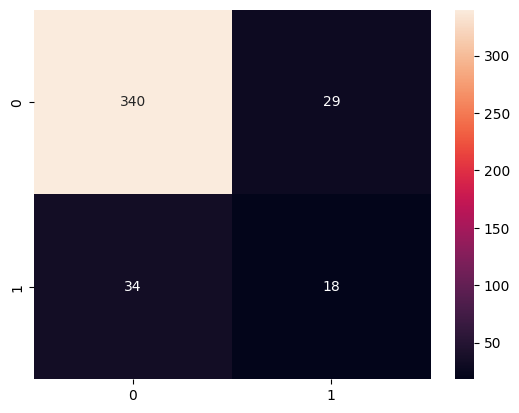

In [40]:
model = DecisionTreeClassifier(criterion='gini', max_depth=20, splitter='random')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt='d')

In [41]:
pickle.dump(model, open('./models/dt_leg.pkl', 'wb'))